##Install libraries for NLP.

In [2]:
!pip install nltk

In [3]:
import nltk

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()

In [0]:
def get_words_dict(text):
  allWords = nltk.tokenize.word_tokenize(text)
  
  allWords = [ps.stem(w) for w in allWords]
      
  allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)   
  
  return allWordExceptStopDist

In [0]:
def update_dictionary(dict1, dict2, words, idx):
  
  for w in words:
    dict2.setdefault(w, []).append(idx)
    
  counter_1 = Counter(dict1)
  counter_2 = Counter(words)
  return (counter_1 + counter_2, dict2)
   

In [0]:
def plot_word_dict(input_dict, size = (1,2)):
  wordcloud = WordCloud(max_font_size=80).generate_from_frequencies(input_dict)
  plt.figure(figsize= size)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  plt.close()

In [0]:
def process_file(file_name):
  
  words_dict = {}
  
  with open(file_name) as file:
    for i, line in file:
      current_words_dict = get_words_dict(line)
      words_dict = update_dictionary(words_dict,current_words_dict)
  
  return words_dict

In [0]:
def process_df(df):
  
  words_dict = {}
  word_to_idx = {}
  
  for i, line in enumerate(df):
    current_words_dict = get_words_dict(line)
    (words_dict, word_to_idx) = update_dictionary(words_dict, word_to_idx,current_words_dict, i)
  
  return (words_dict, word_to_idx)

In [0]:
df = pd.read_csv("vep.functions.tsv", sep="\t", header=None,names=['gene','num','name'])  

In [0]:
words_dict = process_df(df[:]['name'])

In [0]:
words_dict[0]

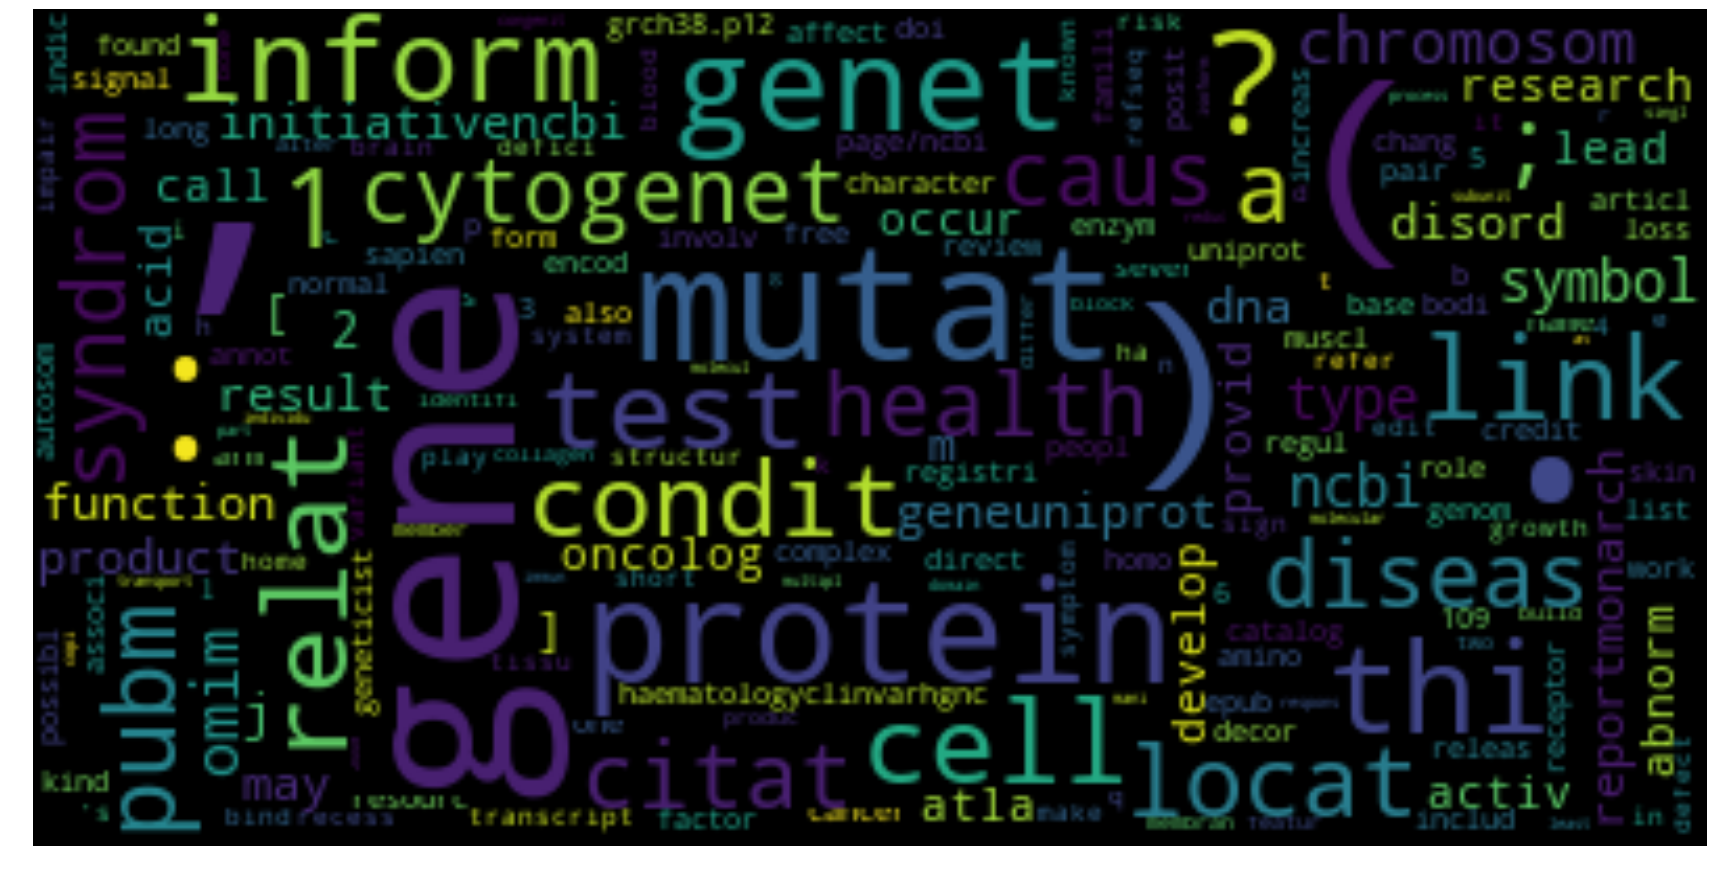

In [0]:
plot_word_dict(words_dict[0], (30, 40))


In [0]:
#instantiate CountVectorizer()
cv=CountVectorizer(stop_words='english', ngram_range=(1,1))
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(df[:]['name'])

In [0]:
word_count_vector

In [0]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["tf_idf_weights"])
 
# sort ascending
most_relevant_values = df_idf.sort_values(by=['tf_idf_weights'],ascending=False).head(300)

In [0]:
most_relevant_values

tf_idf_weights
10                    7.124683
lethality             7.124683
leukodystrophy        7.124683
level                 7.124683
like                  7.124683
limitation            7.124683
location              7.124683
lumbar                7.124683
luteinizing           7.124683
lymphatic             7.124683
lymphocyte            7.124683
macrocephaly          7.124683
macrophage            7.124683
macrophages           7.124683
macula                7.124683
magnetic              7.124683
maintenance           7.124683
malaise               7.124683
malfunction           7.124683
malignant             7.124683
manifesting           7.124683
manual                7.124683
mb                    7.124683
mechanism             7.124683
mediastinum           7.124683
leukemia              7.124683
lesion                7.124683
meiosis               7.124683
layer                 7.124683
inflammatory          7.124683
...                        ...
optic                 7.124683
unit                  7.124683
urea                  7.124683
uric                  7.124683
urinary               7.124683
using                 7.124683
uterine               7.124683
variability           7.124683
verbal                7.124683
vertebrae             7.124683
viable                7.124683
visual                7.124683
vital                 7.124683
vitro                 7.124683
voluntary             7.124683
von                   7.124683
wakefulness           7.124683
waking                7.124683
walled                7.124683
water                 7.124683
widespread            7.124683
willebrand            7.124683
worth                 7.124683
wright                7.124683
yawning               7.124683
upturning             7.124683
uncombable            7.124683
teeth                 7.124683
tympanic              7.124683
temperature           7.124683

[300 rows x 1 columns]

In [0]:
tf_idf_dict = most_relevant_values['tf_idf_weights'].to_dict()

In [0]:
tf_idf_dict

{'10': 6.43372200355424,
 '100': 6.43372200355424,
 'excess': 6.43372200355424,
 'exfoliative': 6.43372200355424,
 'expected': 6.43372200355424,
 'expiratory': 6.43372200355424,
 'external': 6.43372200355424,
 'extrinsic': 6.43372200355424,
 'eye': 6.43372200355424,
 'eyebrows': 6.43372200355424,
 'factor': 6.43372200355424,
 'falling': 6.43372200355424,
 'fanning': 6.43372200355424,
 'fashion': 6.43372200355424,
 'fasting': 6.43372200355424,
 'fatigue': 6.43372200355424,
 'feeling': 6.43372200355424,
 'feelings': 6.43372200355424,
 'feet': 6.43372200355424,
 'fertilization': 6.43372200355424,
 'fetalis': 6.43372200355424,
 'fev1': 6.43372200355424,
 'fibrinogen': 6.43372200355424,
 'fibrous': 6.43372200355424,
 'finding': 6.43372200355424,
 'findings': 6.43372200355424,
 'fingernails': 6.43372200355424,
 'flat': 6.43372200355424,
 'flatness': 6.43372200355424,
 'follicle': 6.43372200355424,
 'food': 6.43372200355424,
 'foot': 6.43372200355424,
 'forced': 6.43372200355424,
 'forceful':

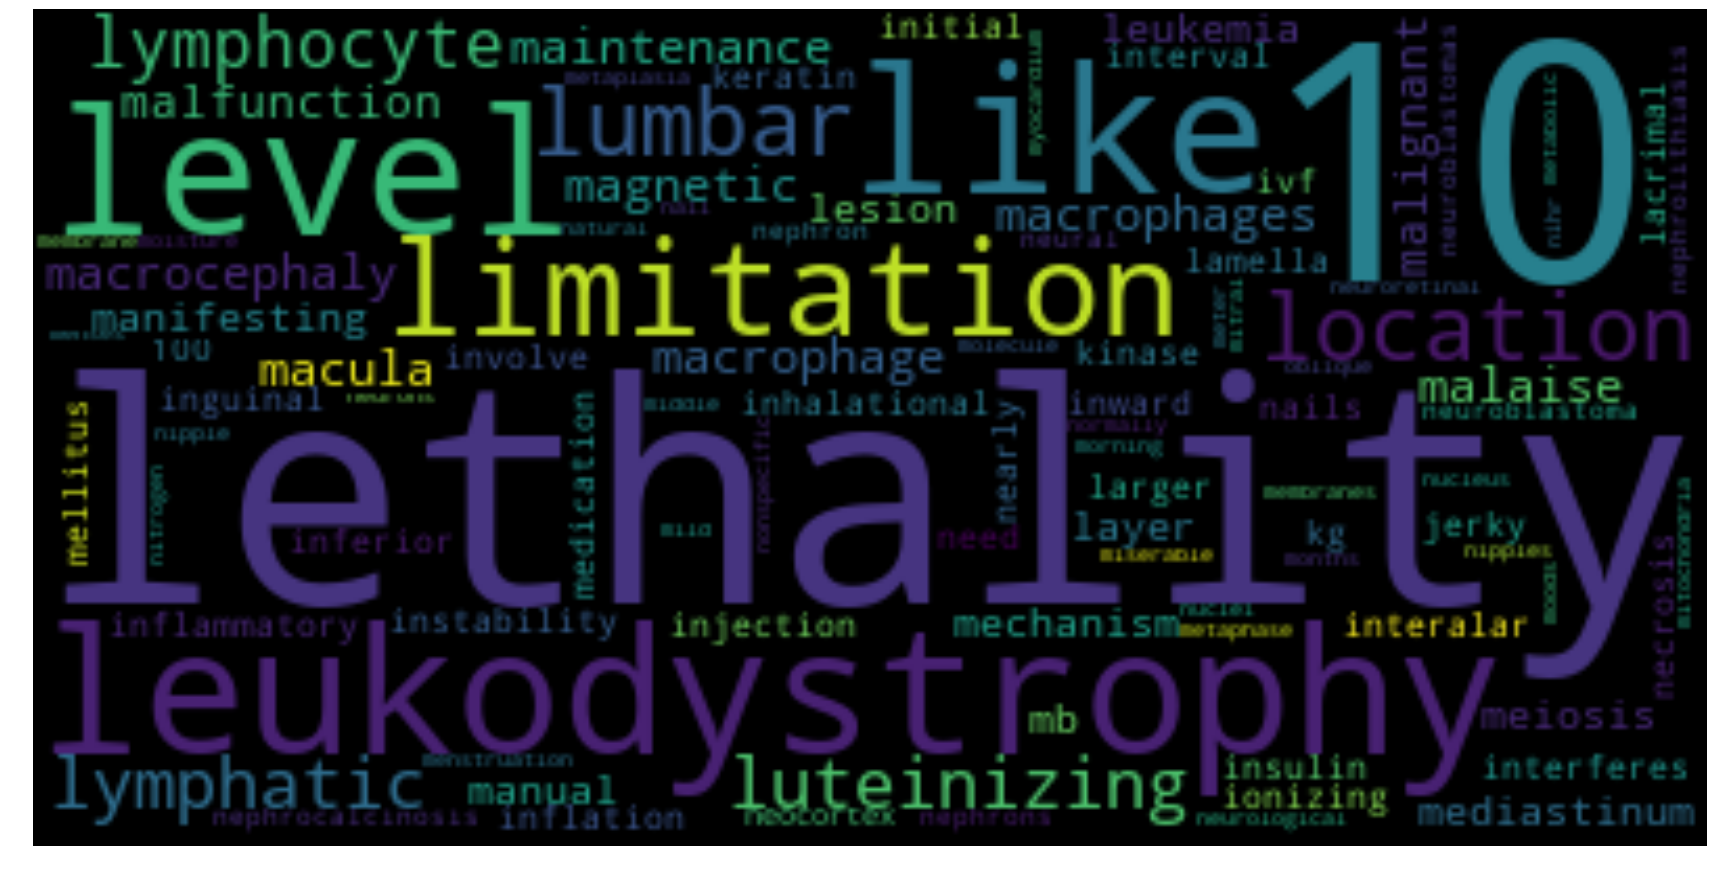

In [0]:
plot_word_dict(tf_idf_dict, (30, 40))


## This is not to accurated due to different parsing strategies but enough for this hackathon.

In [0]:
def word_to_gene(file_name, index = 2):
  
  word_to_gene = {}
  
  with open(file_name) as file:
    for line in file:
      split_line = line.split('\t')
      for word in word_tokenize(split_line[index]):
        word = word.lower()
        if word in word_to_gene:
          word_to_gene[word].append(split_line[0])
        else:
          word_to_gene[word] = [split_line[0]]
  
  return word_to_gene
  

In [0]:
results = []

for x in tf_idf_dict.keys():
  for v in word_gene_dict.get(x,[x]):
    results.append(v)

In [0]:
counter_results = Counter(results)

In [0]:
counter_results

Counter({'ABCA12': 6,
         'ADAMTS18': 1,
         'ADRA2B': 4,
         'AGT': 1,
         'AKR1C2': 3,
         'AMPD1': 2,
         'ANK3': 1,
         'APOA5': 2,
         'ARSA': 5,
         'ARSB': 2,
         'ASB10': 4,
         'ASCL1': 8,
         'ASPSCR1': 5,
         'ATP6V1B1': 7,
         'ATP7B': 7,
         'BCKDHA': 3,
         'CD36': 7,
         'CEL': 4,
         'CKAP2L': 1,
         'CPS1': 1,
         'CREB3L1': 4,
         'CTNNA3': 1,
         'CYBA': 3,
         'DCLRE1C': 8,
         'DDHD1': 5,
         'DNAH9': 1,
         'DRC1': 1,
         'DTNA': 1,
         'EDA2R': 7,
         'EIF2AK3': 1,
         'ERCC6L2': 1,
         'EVC': 5,
         'FIP1L1': 1,
         'FLT3': 2,
         'FRG1': 7,
         'FZD6': 1,
         'GBA': 3,
         'GCNT2': 1,
         'GIGYF2': 19,
         'GIPC3': 1,
         'GJB2': 7,
         'GPR101': 2,
         'GRHL3': 3,
         'GYPC': 2,
         'HFM1': 3,
         'HLA-DQA1': 3,
         'IRF5': 2,
       

In [0]:
unique_freq[:,1]

array([116, 1, 1, 1, 1, 2, 4, 2, 4, 2, 1, 2, 3, 3, 2, 1, 2, 2, 3, 1, 2, 2,
       1, 5, 2, 3, 2, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 4,
       2, 2, 1, 6, 1, 1, 2, 2, 1, 7, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 5,
       1, 1, 8, 6, 2, 1, 1, 1, 4, 1, 4, 6, 1, 1, 3, 2, 2, 1, 4, 1, 2, 2,
       1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 13, 1, 4, 1, 1, 1, 1, 2, 2, 2, 4,
       3, 1, 1, 1, 2, 1, 4, 2, 1, 2, 2, 14, 2, 1, 3, 2, 2, 3, 1, 1, 2, 1,
       2, 1, 1, 2, 6, 1, 6, 1, 3, 6, 3, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 7, 2, 1, 3, 1, 1, 4, 1, 1, 2, 1, 2, 10, 1, 5, 1, 1, 1, 5,
       4, 1, 1, 7, 2, 1, 1, 9, 1, 1, 1, 4, 3, 1, 2, 8, 2, 1, 2, 2, 2, 2,
       4, 3, 5, 1, 3, 1, 3, 3, 2, 5, 1, 1, 11, 1, 3, 2, 2, 4, 1, 3, 1, 1,
       1, 2, 8, 1, 2, 2, 1, 4, 1, 1, 2, 7, 4, 1, 1, 6, 2, 4, 2, 1, 4, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 4, 1, 7, 1, 2, 8,
       1, 1, 3, 5, 1, 8, 1, 1, 6, 1, 4, 3, 2, 1, 1, 1, 2, 7, 3, 8, 1, 1,
       1, 3, 1, 2, 1, 3, 3, 4, 1, 1, 7, 4, 1,

## Try with scrapped information

In [0]:
df = pd.read_csv("ScrappedGenes.tsv", sep="\t", header=None,names=['gene','descr'])
words_dict = process_df(df[:]['descr'][~df["descr"].isnull()])

In [14]:
df[:]['descr'][~df["descr"].isnull()]


0          The HPSE2 gene provides instructions for ma...
4          From NCBI Gene:This gene encodes a ciliary ...
6          From NCBI Gene:This gene is a member of the...
9          From NCBI Gene:This gene encodes a protein ...
21         From NCBI Gene:Loss of sequences from human...
32         From NCBI Gene:This gene encodes a nuclear ...
44         From NCBI Gene:This gene encodes a member o...
48         The MBL2 gene provides instructions for mak...
50         From NCBI Gene:This gene encodes a coiled-c...
51         From NCBI Gene:Ankyrins are a family of pro...
54         From NCBI Gene:This gene encodes a protein ...
55         From NCBI Gene:Striated muscle in vertebrat...
57         The CDH23 gene provides instructions for ma...
59         From NCBI Gene:This gene encodes a secreted...
60         The KAT6B gene provides instructions for ma...
62         From NCBI Gene:MaxiK channels are large con...
63         From NCBI Gene:This gene is one of several ...
65         Fro

In [0]:
#instantiate CountVectorizer()
cv=CountVectorizer(stop_words='english', ngram_range=(1,1))
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(df[:]['descr'][~df["descr"].isnull()])

In [16]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["tf_idf_weights"])
 
# sort ascending
most_relevant_values = df_idf.sort_values(by=['tf_idf_weights'],ascending=False).head(300)

In [0]:
tf_idf_dict = most_relevant_values['tf_idf_weights'].to_dict()

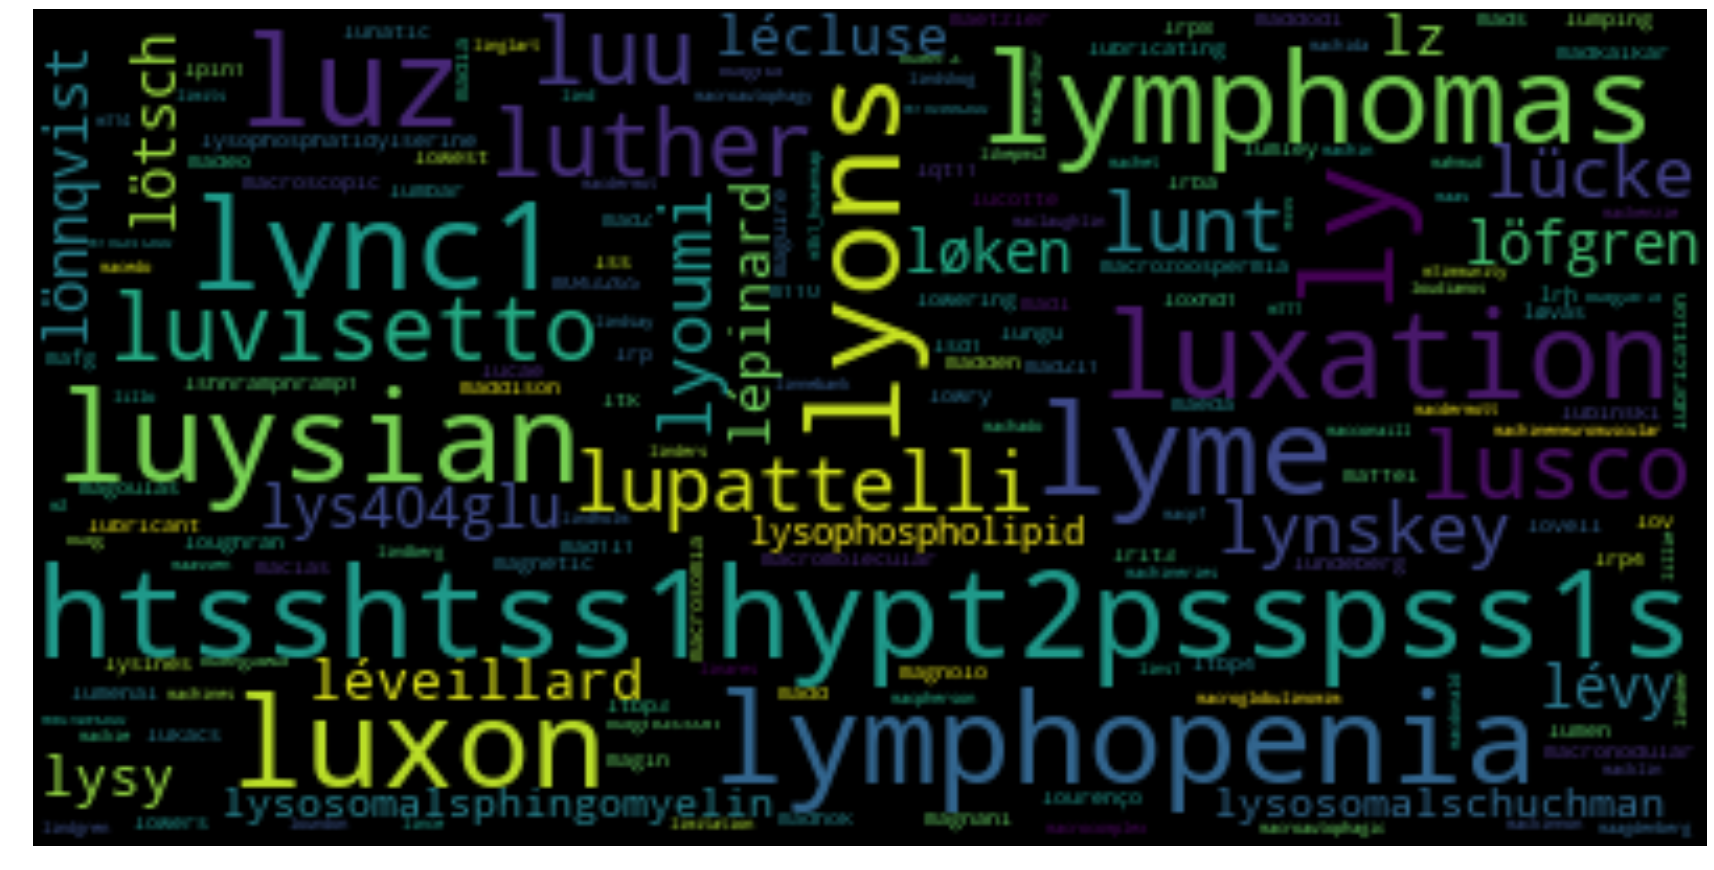

In [19]:
plot_word_dict(tf_idf_dict, (30, 40))

In [0]:
word_gene_dict = word_to_gene('ScrappedGenes.tsv', 1)

In [0]:
results = []

for x in tf_idf_dict.keys():
  for v in word_gene_dict.get(x,[x]):
    results.append(v)

In [0]:
counter_results = Counter(results)

In [23]:
counter_results

Counter({'ABCA12': 1,
         'ABCA4': 5,
         'ABHD12': 4,
         'ACAN': 1,
         'ACP5': 2,
         'AGPAT2': 4,
         'AGRN': 1,
         'AGT': 2,
         'AGXT': 1,
         'AKAP9': 1,
         'ALDOB': 1,
         'ALMS1': 5,
         'ANO5': 4,
         'APOB': 2,
         'ARID1B': 2,
         'ARSA': 1,
         'ARSB': 1,
         'ATP7B': 2,
         'ATXN2': 1,
         'AURKC': 8,
         'B3GLCT': 1,
         'BCL11B': 1,
         'BRCA1': 4,
         'CACNA1A': 5,
         'CACNA1S': 3,
         'CATSPER2': 2,
         'CD36': 3,
         'CDH23': 2,
         'CDK5RAP2': 2,
         'CDSN': 1,
         'CEL': 2,
         'CHRNA5': 2,
         'COL11A2': 2,
         'COL7A1': 1,
         'CPOX': 4,
         'CPS1': 1,
         'CTU2': 1,
         'DMPK': 2,
         'DNAAF2': 1,
         'DOCK8': 2,
         'DSPP': 2,
         'DTNA': 2,
         'EIF2AK4': 2,
         'EMG1': 1,
         'EPG5': 4,
         'ERAP1': 3,
         'EVC': 2,
         'FLG'

## Most relevant genes found by our algorithm.

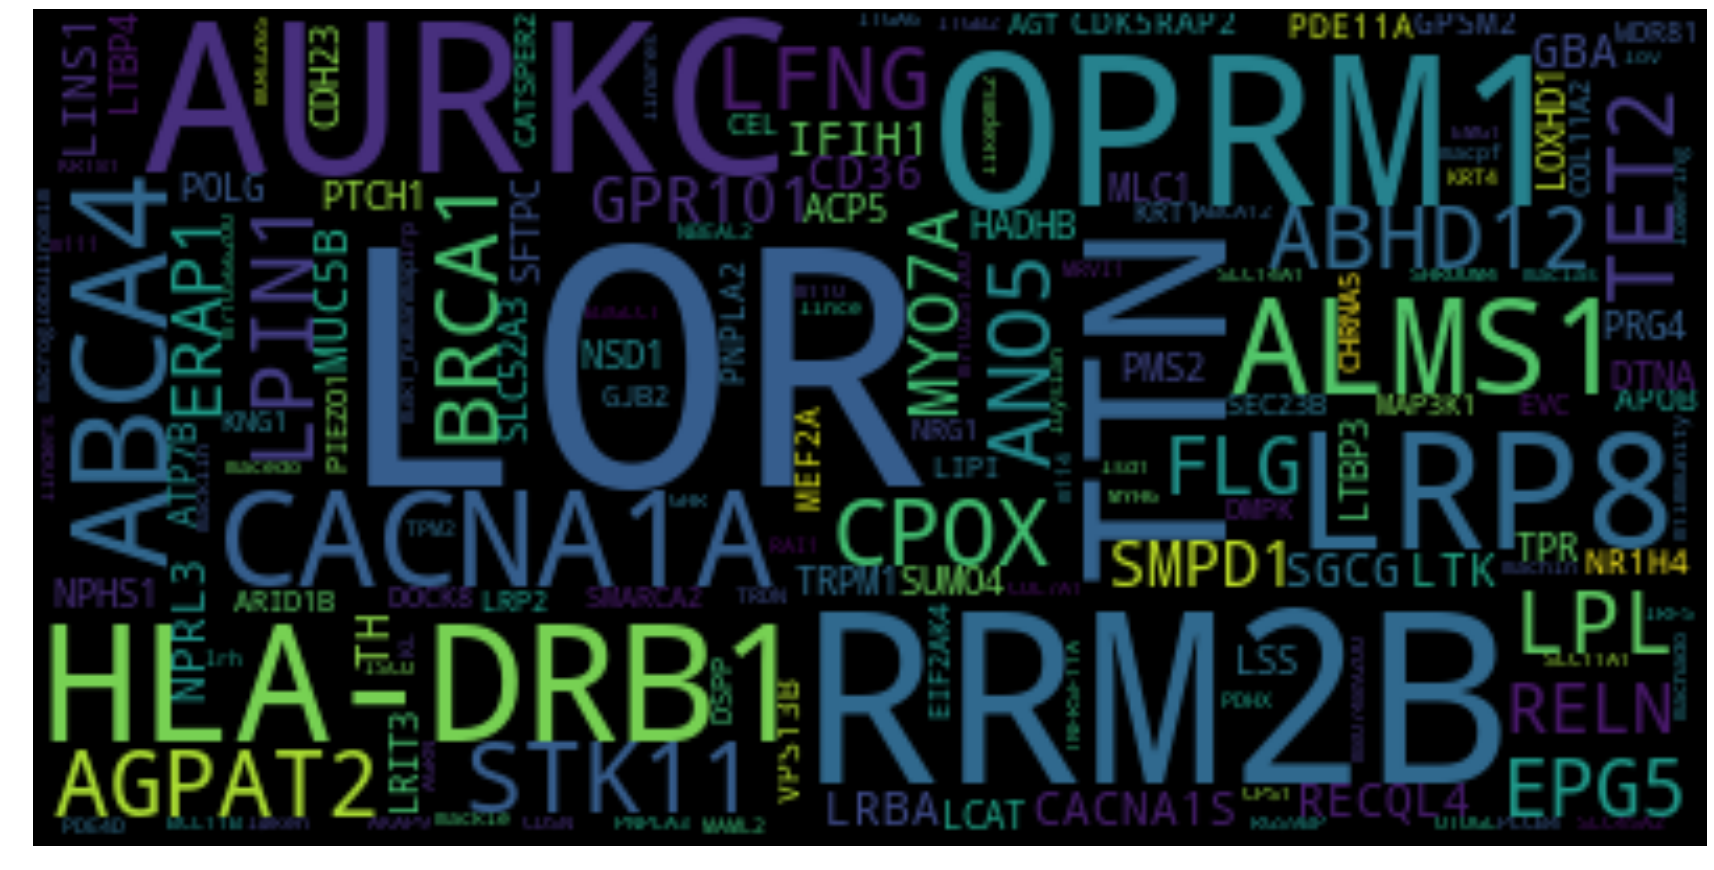

In [24]:
plot_word_dict(counter_results, (30, 40))

## Match most relevant genes found to medical record.

In [25]:
len(counter_results.keys())

201

Get gene description from scrapped values.

In [0]:
most_relevant_genes_desc = df[~df["descr"].isnull()].loc[df['gene'].isin(counter_results.keys())]


In [27]:
most_relevant_genes_desc

gene                                              descr
57       CDH23     The CDH23 gene provides instructions for ma...
79       MRVI1     From NCBI Gene:This gene is similar to a pu...
103      MUC5B     From NCBI Gene:This gene encodes a member o...
122         TH     The TH gene provides instructions for makin...
123       ANO5     The ANO5 gene provides instructions for mak...
130       PDHX     The PDHX gene provides instructions for mak...
145       RNH1     From NCBI Gene:This gene encodes an endonuc...
193      SMPD1     The SMPD1 gene provides instructions for ma...
195      LTBP3     From NCBI Gene:The protein encoded by this ...
216      MYO7A     The MYO7A gene provides instructions for ma...
219     PNPLA2     The PNPLA2 gene provides instructions for m...
234      MAML2     From NCBI Gene:The protein encoded by this ...
237      NR1H4     From NCBI Gene:This gene encodes a ligand-a...
246       ISCU     The ISCU gene provides instructions for mak...
250      ATXN2     The ATXN2 gene provides instructions for ma...
307      KRT81     The KRT81 gene provides instructions for ma...
313       KRT1     The KRT1 gene provides instructions for mak...
317       KRT4     The KRT4 gene provides instructions for mak...
335       EMG1     The EMG1 gene provides instructions for mak...
341      OTOGL     From NCBI Gene:The protein encoded by this ...
350       WNK1     The WNK1 gene provides instructions for mak...
359       GJB2     The GJB2 gene provides instructions for mak...
360       SGCG     The SGCG gene provides instructions for mak...
363       FLT3     The FLT3 gene provides instructions for mak...
365     B3GLCT     The B3GLCT gene (formerly known as B3GALTL)...
366         KL     The KL gene provides instructions for makin...
373      ATP7B     The ATP7B gene provides instructions for ma...
417       MYH6     The MYH6 gene provides instructions for mak...
424       TGM1     The TGM1 gene provides instructions for mak...
432     DNAAF2     From NCBI Gene:This gene encodes a highly c...
...        ...                                                ...
1693     OPRM1     The OPRM1 gene provides instructions for ma...
1695    ARID1B     The ARID1B gene provides instructions for m...
1708       TBP     The TBP gene provides instructions for maki...
1721      CDSN     From NCBI Gene:This gene encodes a protein ...
1723     HLA-B     The HLA-B gene provides instructions for ma...
1732  HLA-DRB1     The HLA-DRB1 gene provides instructions for...
1736   COL11A2     The COL11A2 gene provides instructions for ...
1756    KHDC3L     The KHDC3L gene provides instructions for m...
1776      RELN     The RELN gene provides instructions for mak...
1783      IRF5     The protein produced from the IRF5 gene, ca...
1827      LFNG     From NCBI Gene:This gene is a member of the...
1844      PMS2     The PMS2 gene provides instructions for mak...
1857      CD36     From NCBI Gene:The protein encoded by this ...
1863     AKAP9     From NCBI Gene:The A-kinase anchor proteins...
1866    VPS13B     Researchers are still working to determine ...
1868     RRM2B     The RRM2B gene provides instructions for ma...
1895    RECQL4     The RECQL4 gene provides instructions for m...
1901       LPL     The LPL gene provides instructions for maki...
1903     SFTPC     The SFTPC gene provides instructions for ma...
1912      NRG1     From NCBI Gene:The protein encoded by this ...
1936     ALDOB     The ALDOB gene provides instructions for ma...
1946  CDK5RAP2     From NCBI Gene:This gene encodes a regulato...
1957       CEL     From NCBI Gene:The protein encoded by this ...
1964    AGPAT2     The AGPAT2 gene provides instructions for m...
1971   SMARCA2     The SMARCA2 gene provides instructions for ...
1973     DOCK8     The DOCK8 gene provides instructions for ma...
1982      TPM2     The TPM2 gene provides instructions for mak...
2006     PTCH1     The PTCH1 gene provides instructions for pr...
2023    GPR101     The GPR101 gene provides instru

## Read medical record

In [0]:
medical_record = ""

with open("MedicalRecords_JCM_Mostly_Complete_Medical_History-pdf-page-1-text.txt") as file:
  
  for line in file:
    medical_record += line
  

In [0]:
df2 = pd.DataFrame([["Record",medical_record]], columns=list(['gene','descr']))

In [30]:
df2

gene                                              descr
0  Record  John\nMicke\\n/\n6\n(D.O.B)\nMedica\nAGE: 33\n...

In [0]:
most_relevant_genes_desc = most_relevant_genes_desc.append(df2)

In [73]:
most_relevant_genes_desc.iloc[94,:]

gene                                                   TTN
descr       The TTN gene provides instructions for maki...
Name: 1302, dtype: object

In [0]:
#instantiate CountVectorizer()
cv=CountVectorizer(stop_words='english', ngram_range=(1,1))
 
# this steps generates word counts for the words in your docs
word_count_vector = cv.fit_transform(most_relevant_genes_desc[:]['descr'])

Data normalization missing, but we have only 20 minutes.

In [0]:
cosine_similarity = word_count_vector[:][-1] * word_count_vector.T

In [71]:
cosine_similarity.T[94].todense()

matrix([[258]])

In [61]:
cosine_similarity.todense()

matrix([[ 57,   7,   9,  74, 149,  23,   9,  29,  17,  68,  27,   5,  17,
          44,  28,  13,  99,  31,  32,   3,  52, 147,  54,  18,  28,  26,
          34,  86,  47,  12,  13,  18,   3,  49,  22,   8,  35,   2,  59,
         165,  21,  61,   2,  12,   4, 106,  45,   6,  49,  20,  29,  19,
           3,  36,   8,  51,   9,  49,  37, 116,  18,  27,  26,  80,  36,
           6,  77, 112,  25,  77,  10,   3,  84,  48,  18,  20,  56,  19,
          28,  11,  49,  17,   8,  44,   3,  27,  26,  49,  36,  13, 130,
          82,  35,  11, 258,  27, 124,  56,   3,  22,  77,  48,  38,  24,
          43, 131,  23,  37,   4,  14,   7,  54,  38,  54,  30,  89,  47,
           8,  23,   6,  17,  33,   9,  95,  62,  84,  15, 174, 137,  92,
          23,  45,  38,  11,  38,  27,   8,  52,  96,  73,  70,  31,   6,
          32,  13,   3,  35,  34,  57, 166,  85,  53,   1, 350]],
       dtype=int64)